# Investigating Car Crashes in Chicago, IL

## Introduction

##### The Task

The City of Chicago has tasked Halper Consulting with identifying root factors that contribute to a variety of car crashes. 

#### The Data

The City of Chicago has provided a dataset of all car crashes within city limits from 2015 - Present
The Dataset includes:
- 774,000+ Car Crashes
- 1,580,000 + Vehicles involved in these crashes

#### The Approach

There are three car crash category causes of interest:
Those Involving:
- Traffic Violations
- Environment Factors
- Distracted Driving

We build out three models for each car crash type and treat it each as seperate binary classification problem
- Random Forest
- XGBoost
- Stacking Classifier with the previous two models and utilizing logistic regression as final estimator
Leveraging the intepretability of the models we use Feature Importances to tease out the most important contributing factors to each crash type

## Data Prep and Cleaning

###### Importing Necessary Modules for Data Manupulation Prep

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


###### Importing Datasets

In [77]:
#Importing Both Datasets
file_path = "C:/Users/jhalp/documents/Phase-4-Project/zippedData/Crashes.csv"
df = pd.read_csv(file_path)
file_path_2 = "C:/Users/jhalp/documents/Phase-4-Project/zippedData/Vehicles.csv"
df_2 = pd.read_csv(file_path_2)

C:\Users\jhalp\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (19,21,40,41,42,44,48,49,50,53,55,58,59,61) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


###### Investigating Dataset 2

In [78]:
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,772994.000000,1.990060e+05,772994.000000,772989.000000,772994.000000,771313.000000,771313.000000,771313.000000,771313.000000,771313.000000,771313.000000,771313.0,772994.000000,772994.000000,772994.000000,767840.000000,767840.000000
mean,28.394141,1.333032e+01,3685.655292,1242.302964,2.034736,0.188358,0.001189,0.020115,0.106547,0.060507,2.005094,0.0,13.207976,4.124048,6.668248,41.854835,-87.673573
std,6.197118,2.961623e+03,2888.827546,705.415878,0.452379,0.563826,0.037383,0.166159,0.420903,0.316451,1.159623,0.0,5.564347,1.980171,3.365118,0.331789,0.673790
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1245.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782341,-87.721640
50%,30.000000,2.000000e+00,3200.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874655,-87.674002
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924270,-87.633243
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 772994 entries, 0 to 772993
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                772994 non-null  object 
 1   RD_NO                          768604 non-null  object 
 2   CRASH_DATE_EST_I               58126 non-null   object 
 3   CRASH_DATE                     772994 non-null  object 
 4   POSTED_SPEED_LIMIT             772994 non-null  int64  
 5   TRAFFIC_CONTROL_DEVICE         772994 non-null  object 
 6   DEVICE_CONDITION               772994 non-null  object 
 7   WEATHER_CONDITION              772994 non-null  object 
 8   LIGHTING_CONDITION             772994 non-null  object 
 9   FIRST_CRASH_TYPE               772994 non-null  object 
 10  TRAFFICWAY_TYPE                772994 non-null  object 
 11  LANE_CNT                       199006 non-null  float64
 12  ALIGNMENT                     

###### 48 Total Features: 17 Numeric, 32 Categorical

### Target Variable is Primary Cause of the Accident

In [80]:
#Looking at the Value Counts for our Target
df["PRIM_CONTRIBUTORY_CAUSE"].value_counts()

UNABLE TO DETERMINE                                                                 299699
FAILING TO YIELD RIGHT-OF-WAY                                                        84637
FOLLOWING TOO CLOSELY                                                                75892
NOT APPLICABLE                                                                       40945
IMPROPER OVERTAKING/PASSING                                                          37945
FAILING TO REDUCE SPEED TO AVOID CRASH                                               32693
IMPROPER BACKING                                                                     30794
IMPROPER LANE USAGE                                                                  27910
DRIVING SKILLS/KNOWLEDGE/EXPERIENCE                                                  25676
IMPROPER TURNING/NO SIGNAL                                                           25647
DISREGARDING TRAFFIC SIGNALS                                                         15012

###### Too Many Causes; Let's Consolidate

In [81]:
#Initializing Map to Consolidate the Primary Causes
cat_map = {
    "Unable to Determine": [
        "UNABLE TO DETERMINE",
        "NOT APPLICABLE"],
    "Traffic Violations": [
        "FAILING TO YIELD RIGHT-OF-WAY",
        "FOLLOWING TOO CLOSELY",
        "IMPROPER OVERTAKING/PASSING",
        "IMPROPER BACKING",
        "IMPROPER LANE USAGE",
        "IMPROPER TURNING/NO SIGNAL",
        "DISREGARDING TRAFFIC SIGNALS",
        "DISREGARDING STOP SIGN",
        "DRIVING ON WRONG SIDE/WRONG WAY",
        "EXCEEDING AUTHORIZED SPEED LIMIT",
        "EXCEEDING SAFE SPEED FOR CONDITIONS",
        "DISREGARDING OTHER TRAFFIC SIGNS",
        "DISREGARDING ROAD MARKINGS",
        "DISREGARDING YIELD SIGN",
        "PASSING STOPPED SCHOOL BUS",
        "OBSTRUCTED CROSSWALKS",
        "FAILING TO REDUCE SPEED TO AVOID CRASH",
        "OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER",
        "EXCEEDING AUTHORIZED SPEED LIMIT",
        "DISREGARDING OTHER TRAFFIC SIGNS",
        "DISREGARDING STOP SIGN",
        "DISREGARDING YIELD SIGN",
        "PASSING STOPPED SCHOOL BUS",
        "OBSTRUCTED CROSSWALKS",
        "TURNING RIGHT ON RED",
        "BICYCLE ADVANCING LEGALLY ON RED LIGHT",
        "MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT"],
    "Distracted Driving": [
        "DISTRACTION - FROM INSIDE VEHICLE",
        "DISTRACTION - FROM OUTSIDE VEHICLE",
        "CELL PHONE USE OTHER THAN TEXTING",
        "DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)",
        "TEXTING",
        "UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)",
        "HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)"], 
        "Environmental Factors": [
        "WEATHER",
        "VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)",
        "ROAD ENGINEERING/SURFACE/MARKING DEFECTS",
        "ROAD CONSTRUCTION/MAINTENANCE",
        "EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST",
        "ANIMAL"],
    "Vehicle-Related Issues": [
        "EQUIPMENT - VEHICLE CONDITION",
        "PHYSICAL CONDITION OF DRIVER"],
    "Misc Specific Scenarios": [
        "RELATED TO BUS STOP"]
}


In [82]:
#Function to Map the New Categories
def new_category_map(primary_cause):
    for category, primary_causes in cat_map.items():
        if primary_cause in primary_causes:
            return category


In [83]:
#Mapping Categories
df["prim_cause_category"] = df["PRIM_CONTRIBUTORY_CAUSE"].map(new_category_map)

### Let's Take a look at the Crash Cause Categories Now

In [84]:
#Finding the Count of Each Crash Cause
df["prim_cause_category"].value_counts()

Traffic Violations         360285
Unable to Determine        340644
Environmental Factors       21829
Distracted Driving          14720
Vehicle-Related Issues       9485
Misc Specific Scenarios       355
Name: prim_cause_category, dtype: int64

###### Looks Very Unbalanced; Also need to drop the "Unable to Determines"

In [85]:
#dropping Unable to Determine Target Variable rows
df_final = df[df["prim_cause_category"] != "Unable to Determine"]

In [86]:
#Finding NA's
df_final.isna().sum()

CRASH_RECORD_ID                       0
RD_NO                              2313
CRASH_DATE_EST_I                 410711
CRASH_DATE                            0
POSTED_SPEED_LIMIT                    0
TRAFFIC_CONTROL_DEVICE                0
DEVICE_CONDITION                      0
WEATHER_CONDITION                     0
LIGHTING_CONDITION                    0
FIRST_CRASH_TYPE                      0
TRAFFICWAY_TYPE                       0
LANE_CNT                         310013
ALIGNMENT                             0
ROADWAY_SURFACE_COND                  0
ROAD_DEFECT                           0
REPORT_TYPE                       12763
CRASH_TYPE                            0
INTERSECTION_RELATED_I           308122
NOT_RIGHT_OF_WAY_I               414622
HIT_AND_RUN_I                    328993
DAMAGE                                0
DATE_POLICE_NOTIFIED                  0
PRIM_CONTRIBUTORY_CAUSE               0
SEC_CONTRIBUTORY_CAUSE                0
STREET_NO                             0


In [87]:
#Dropping Irrelevant Features
columns_to_drop = ["LOCATION", "LATITUDE", "LONGITUDE", "RD_NO", "CRASH_DATE", "CRASH_DATE_EST_I", "LANE_CNT",
                   "WORKERS_PRESENT_I", "WORK_ZONE_I", "WORK_ZONE_TYPE", "PHOTOS_TAKEN_I", "WORKERS_PRESENT_I",
                   "STATEMENTS_TAKEN_I", "NOT_RIGHT_OF_WAY_I", "DOORING_I", "INTERSECTION_RELATED_I", "NOT_RIGHT_OF_WAY_I",
                   "HIT_AND_RUN_I"]

df_final = df_final.drop(columns=columns_to_drop, axis=1)


###### Let's Move on to the Vehicles Dataset

In [88]:
#Looking at the datatypes for the vehicles dataset
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578342 entries, 0 to 1578341
Data columns (total 72 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   CRASH_UNIT_ID             1578342 non-null  int64  
 1   CRASH_RECORD_ID           1578342 non-null  object 
 2   RD_NO                     1569165 non-null  object 
 3   CRASH_DATE                1578342 non-null  object 
 4   UNIT_NO                   1578342 non-null  int64  
 5   UNIT_TYPE                 1576264 non-null  object 
 6   NUM_PASSENGERS            233608 non-null   float64
 7   VEHICLE_ID                1542246 non-null  float64
 8   CMRC_VEH_I                29446 non-null    object 
 9   MAKE                      1542241 non-null  object 
 10  MODEL                     1542096 non-null  object 
 11  LIC_PLATE_STATE           1401207 non-null  object 
 12  VEHICLE_YEAR              1293213 non-null  float64
 13  VEHICLE_DEFECT            1

###### Way too Many Features and We're going to have to aggregate due to the nature of the data

In [89]:
#Aggregating the features of interest by car crash ID
aggregated_data = df_2.groupby('CRASH_RECORD_ID').agg({
    'VEHICLE_YEAR': 'first',
    'VEHICLE_DEFECT': 'first',
    'VEHICLE_TYPE': 'first',
    'VEHICLE_USE': 'first',
    'TRAVEL_DIRECTION': 'first',
    'MANEUVER': 'first'
    
}).reset_index()

final_data = pd.merge(df_final, aggregated_data, on='CRASH_RECORD_ID')

In [90]:
#looking at merged dataset
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 432349 entries, 0 to 432348
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_RECORD_ID                432349 non-null  object 
 1   POSTED_SPEED_LIMIT             432349 non-null  int64  
 2   TRAFFIC_CONTROL_DEVICE         432349 non-null  object 
 3   DEVICE_CONDITION               432349 non-null  object 
 4   WEATHER_CONDITION              432349 non-null  object 
 5   LIGHTING_CONDITION             432349 non-null  object 
 6   FIRST_CRASH_TYPE               432349 non-null  object 
 7   TRAFFICWAY_TYPE                432349 non-null  object 
 8   ALIGNMENT                      432349 non-null  object 
 9   ROADWAY_SURFACE_COND           432349 non-null  object 
 10  ROAD_DEFECT                    432349 non-null  object 
 11  REPORT_TYPE                    419586 non-null  object 
 12  CRASH_TYPE                    

###### 39 Total Features, 15 Numeric and 25 Categorical

###### Let's get our final features and get dummies for our categorical rows

In [93]:
#Finalizing our Features
categorical_columns = ['TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION',
                    'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
                        'DAMAGE',
                        'MOST_SEVERE_INJURY',
                       'VEHICLE_TYPE','TRAVEL_DIRECTION', 'MANEUVER']

non_categorical_columns = ['POSTED_SPEED_LIMIT', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', "prim_cause_category"]


In [103]:
#Combining our Final Features and Dropping NA's
combined_df = pd.concat([final_data[categorical_columns], final_data[non_categorical_columns]], axis=1)
cleaned_df = combined_df.dropna()


###### Exploratory Data Analysis for DF

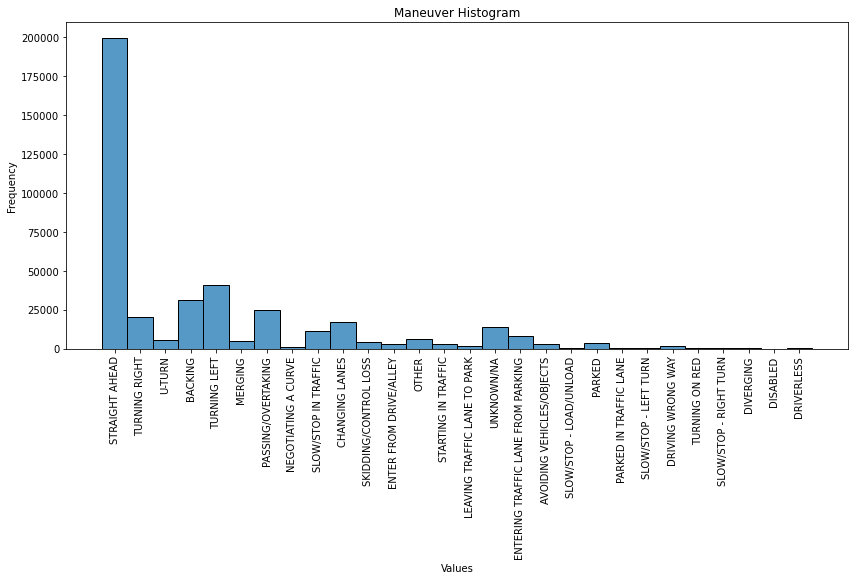

In [110]:
#Maneuver Distribution for Crashes
plt.figure(figsize=(14, 6))
sns.histplot(cleaned_df["MANEUVER"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Maneuver Histogram")
plt.xticks(rotation =90)
plt.show()

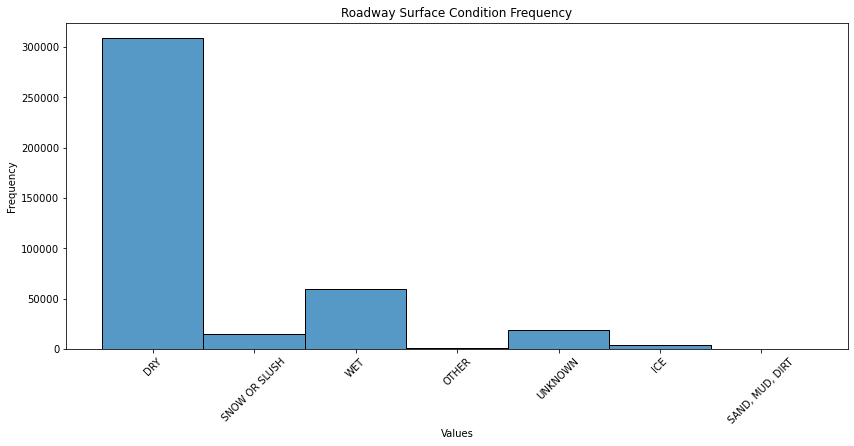

In [111]:
#Roadway Surface Condition Distribution
plt.figure(figsize=(14, 6))
sns.histplot(cleaned_df["ROADWAY_SURFACE_COND"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Roadway Surface Condition Frequency")
plt.xticks(rotation =45)
plt.show()

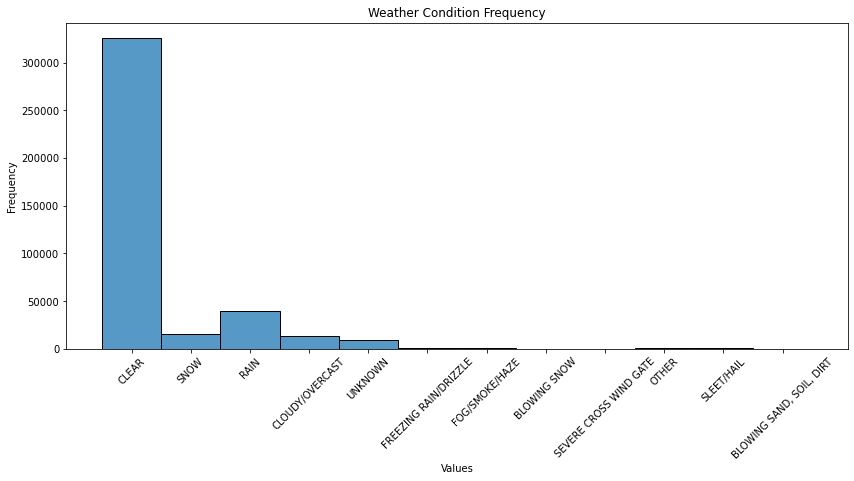

In [112]:
#Weather Condition Distribution
plt.figure(figsize=(14, 6))
sns.histplot(cleaned_df["WEATHER_CONDITION"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Weather Condition Frequency")
plt.xticks(rotation =45)
plt.show()

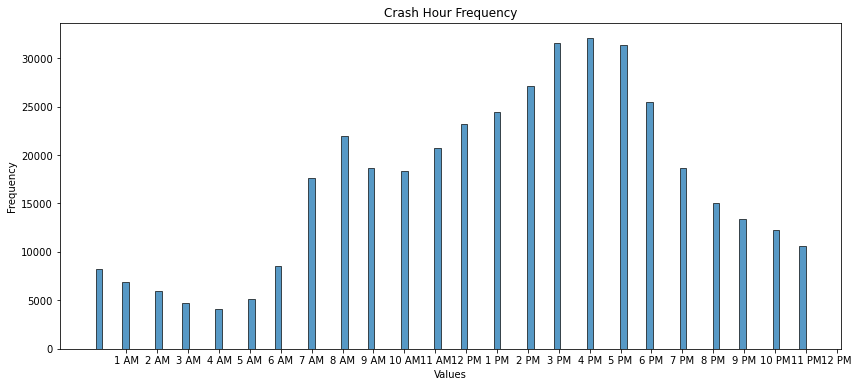

In [118]:
#Crash Hour Distribution
plt.figure(figsize=(14, 6))
sns.histplot(cleaned_df["CRASH_HOUR"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Crash Hour Frequency")
hour_labels = [f"{hour} AM" if hour < 12 else f"{hour-12} PM" if hour > 12 else "12 PM" for hour in range(1, 25)]

plt.xticks(range(1, 25), hour_labels)
plt.show()

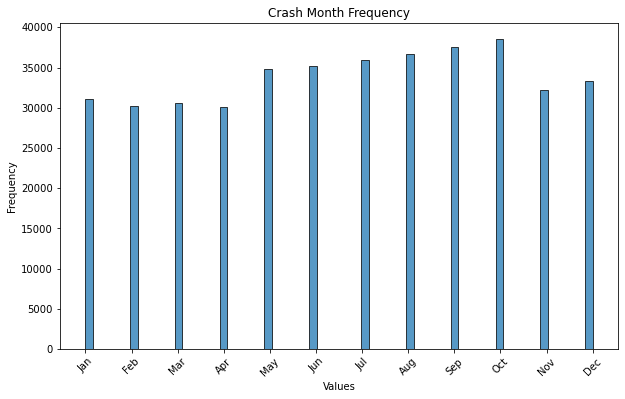

In [120]:
# Crash Month Distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df["CRASH_MONTH"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Crash Month Frequency")
plt.xticks(rotation =45)
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(range(1,13), month_labels)
plt.show()

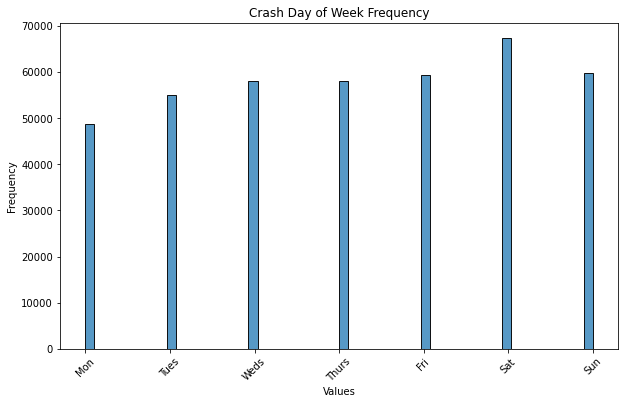

In [123]:
#Crash day of week distribution
plt.figure(figsize=(10, 6))
sns.histplot(cleaned_df["CRASH_DAY_OF_WEEK"])
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Crash Day of Week Frequency")
plt.xticks(rotation =45)
day_labels = ["Mon", "Tues", "Weds", "Thurs","Fri","Sat","Sun" ]
plt.xticks(range(1,8), day_labels)
plt.show()

###### Looking at Distribution of Our Target Variable

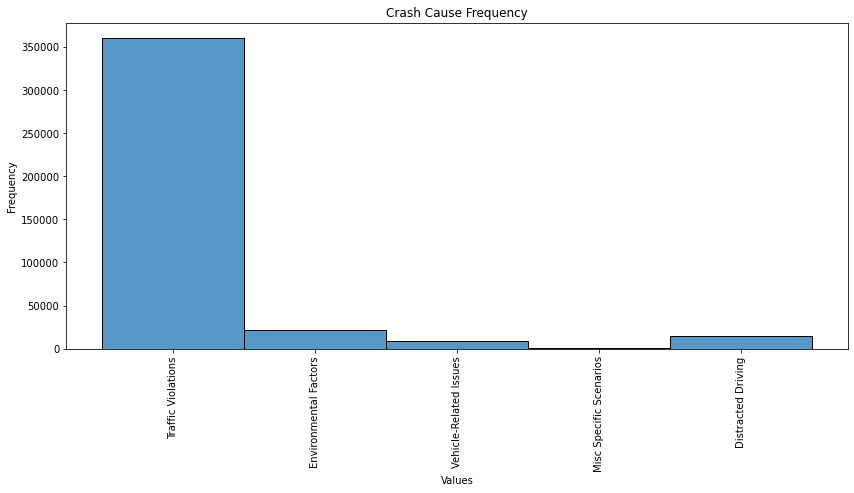

In [114]:
#Target Variable Distribution
plt.figure(figsize=(14, 6))
sns.histplot(preprocessed_df["prim_cause_category"])  
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Crash Cause Frequency")
plt.xticks(rotation =90)
plt.show()

###### Super Imbalanced; Going to need to downsample

###### Getting Dummies for the Categorical Columns to prepare for ML

In [107]:
categorical_df_encoded = pd.get_dummies(cleaned_df[categorical_columns], columns=categorical_columns, drop_first=True)
preprocessed_df = pd.concat([categorical_df_encoded, cleaned_df[non_categorical_columns]], axis=1)
print(len(final_encoded_df))

406263


###### Downsampling 

In [115]:
#Seperating into Majority and Minority Classes
minority_df = preprocessed_df[preprocessed_df["prim_cause_category"] != "Traffic Violations"]
majority_df = preprocessed_df[preprocessed_df["prim_cause_category"] == "Traffic Violations"]

In [124]:
#finding # of observations of the minority sample
print(len(minority_df))

46182


###### Resampling the Majority Class to Match our Minority

In [127]:
#Downsampling the Majority Class
from sklearn.utils import resample
majority_df_resample = resample(majority_df, replace = False, n_samples = 46182, random_state=42)

###### Rejoining the Dataframes

In [128]:
#Rejoining the Downsamples Majority with the minority classes
preprocessed_df = pd.concat([majority_df_resample, minority_df])

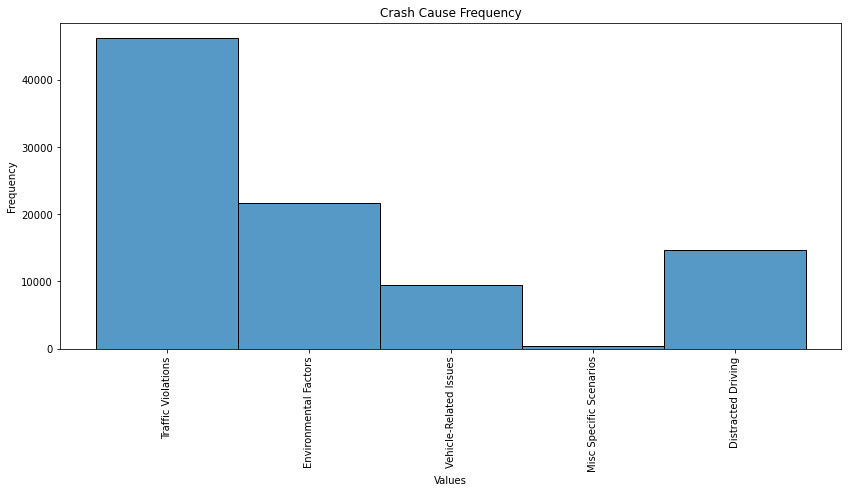

In [130]:
#Visualizing the new balanced dataset
plt.figure(figsize=(14, 6))
sns.histplot(preprocessed_df["prim_cause_category"])  
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Crash Cause Frequency")
plt.xticks(rotation =90)
plt.show()

###### Much more Balanced!

## Time for Machine Learning!

In [145]:
#Import all the modules we will need 
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
import xgboost as xgb







###### For Fun: Let's Start with a Multi-Class Decision Tree to see what type of accuracy we can get

In [133]:
#Initializing DT Pipeline
pipeline_dt_base = Pipeline([
    ("ss", StandardScaler()),
    ('classifier', DecisionTreeClassifier(max_depth=20))])

In [312]:
#TrainTestSplitting Our Data and Extracting our X and y DF's
X = preprocessed_df.drop(columns=["prim_cause_category"])
y = preprocessed_df["prim_cause_category"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###### Fitting Our Model

In [137]:
#Fitting the Multi-Class DT
pipeline_dt_base.fit(X_train, y_train)


Pipeline(steps=[('ss', StandardScaler()),
                ('classifier', DecisionTreeClassifier(max_depth=20))])

###### Predicting on the Test

In [139]:

y_pred = pipeline_dt_base.predict(X_test)

In [141]:
#Evaluating Results
accuracy1 = accuracy_score(y_test, y_pred)
conf_matrix1 = confusion_matrix(y_test, y_pred)
classification_rep1 = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy1}")
print(f"Confusion Matrix:\n{conf_matrix1}")
print(f"Classification Report:\n{classification_rep1}")

Accuracy: 0.579386131110269
Confusion Matrix:
[[ 672  290    2 1795  151]
 [ 257 2375    2 1533  104]
 [   6    8    0   52    2]
 [ 621  939    6 7460  264]
 [ 380  242    1 1115  196]]
Classification Report:
                         precision    recall  f1-score   support

     Distracted Driving       0.35      0.23      0.28      2910
  Environmental Factors       0.62      0.56      0.58      4271
Misc Specific Scenarios       0.00      0.00      0.00        68
     Traffic Violations       0.62      0.80      0.70      9290
 Vehicle-Related Issues       0.27      0.10      0.15      1934

               accuracy                           0.58     18473
              macro avg       0.37      0.34      0.34     18473
           weighted avg       0.54      0.58      0.55     18473



###### Not Very Good! But Let's Move on to the Meat of the Problem

### Building Binary Classification Problems for Each Crash Type

###### First, need to build target variables for each crash cause

In [142]:
#Creating 0:1 Target Variables for Each Crash Cause
crash_cause_categories = ["Traffic Violations", "Environmental Factors", "Distracted Driving", "Vehicle-Related Issues", ""]
for category in crash_cause_categories:
    preprocessed_df[category + '_target'] = (preprocessed_df['prim_cause_category'] == category).astype(int)

In [143]:
#Taking a look at the columns 
preprocessed_df.columns

Index(['TRAFFIC_CONTROL_DEVICE_DELINEATORS',
       'TRAFFIC_CONTROL_DEVICE_FLASHING CONTROL SIGNAL',
       'TRAFFIC_CONTROL_DEVICE_LANE USE MARKING',
       'TRAFFIC_CONTROL_DEVICE_NO CONTROLS',
       'TRAFFIC_CONTROL_DEVICE_NO PASSING', 'TRAFFIC_CONTROL_DEVICE_OTHER',
       'TRAFFIC_CONTROL_DEVICE_OTHER RAILROAD CROSSING',
       'TRAFFIC_CONTROL_DEVICE_OTHER REG. SIGN',
       'TRAFFIC_CONTROL_DEVICE_OTHER WARNING SIGN',
       'TRAFFIC_CONTROL_DEVICE_PEDESTRIAN CROSSING SIGN',
       ...
       'INJURIES_NON_INCAPACITATING', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK',
       'CRASH_MONTH', 'prim_cause_category', 'Traffic Violations_target',
       'Environmental Factors_target', 'Distracted Driving_target',
       'Vehicle-Related Issues_target', '_target'],
      dtype='object', length=153)

###### 153 Features

###### MODEL 1: XGBoost (Traffic Violation - Cause)

###### Splitting the Data

In [148]:
X_TrafficViolation = preprocessed_df.drop(columns=["prim_cause_category", "Environmental Factors_target", "Distracted Driving_target", "Vehicle-Related Issues_target", "Traffic Violations_target", "_target"])
y_TrafficViolation = preprocessed_df["Traffic Violations_target"]
X_train_tv, X_test_tv, y_train_tv, y_test_tv = train_test_split(X_TrafficViolation, y_TrafficViolation, test_size=0.2, random_state=42)



###### Initializing the CVSearch

In [149]:
param_grid = {
    'classifier__n_estimators': [200, 300], 
    'classifier__max_depth': [10, 20],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__subsample': [0.8, 0.9],
}
xgb_classifier = xgb.XGBClassifier()


pipeline_model1 = Pipeline([
    ('ss', StandardScaler()),
    ('classifier', xgb_classifier)
])
grid_search_model1 = GridSearchCV(estimator = pipeline_model1, param_grid = param_grid, cv=3, verbose=3, n_jobs=20)




###### Fitting the Model(s)

In [150]:
grid_search_model1.fit(X_train_tv, y_train_tv)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  26 out of  48 | elapsed: 19.0min remaining: 16.1min
[Parallel(n_jobs=20)]: Done  43 out of  48 | elapsed: 24.1min remaining:  2.8min
[Parallel(n_jobs=20)]: Done  48 out of  48 | elapsed: 24.8min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                               

#### Saving the Best Params and the Best Estimator from CV Search

In [185]:
best_params = grid_search_model1.best_params_
print(best_params)
best_model_xgb_tv = grid_search_model1.best_estimator_
best_score = grid_search_model1.best_score_
best_score

{'classifier__learning_rate': 0.1, 'classifier__max_depth': 10, 'classifier__n_estimators': 200, 'classifier__subsample': 0.9}


0.6976221672294489

###### MODEL 2: RandomForest (Traffic Violation - Cause)

###### Intializing the CV Search

In [186]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 15],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__criterion': ['gini', 'entropy']
}


pipeline_model2 = Pipeline([
    ("ss", StandardScaler()),
    ('classifier', RandomForestClassifier(n_jobs=20))
])

grid_search_model2 = GridSearchCV(estimator = pipeline_model2, param_grid = param_grid, cv=3, verbose=3, n_jobs=20)





###### Fitting the Models

In [187]:
grid_search_model2.fit(X_train_tv, y_train_tv)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  90 out of  96 | elapsed:  1.9min remaining:    7.6s
[Parallel(n_jobs=20)]: Done  96 out of  96 | elapsed:  2.0min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=20))]),
             n_jobs=20,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 15],
                         'classifier__max_features': ['auto', 'sqrt'],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             verbose=3)

###### Extracting Best Model and Looking at Score

In [188]:
best_params = grid_search_model2.best_params_
print(best_params)
best_model_rf_tv = grid_search_model2.best_estimator_
best_score = grid_search_model2.best_score_
best_score

{'classifier__criterion': 'entropy', 'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


0.6923847124441861

###### Extracting Model from Pipeline for Later Feature Importance Analysis

In [189]:
base_model_rf = best_model_rf_tv.named_steps['classifier']
base_model_xgb = best_model_xgb_tv.named_steps['classifier']  

### Model 3: StackedClassifier(Final Estimator: Logistic Regression)

In [163]:
#Setting up Final Estimator
from sklearn.linear_model import LogisticRegression

final_model = LogisticRegression(c=)

In [164]:
#Running the Stacked Classifier
from sklearn.ensemble import StackingClassifier
base_models = [("rf",base_model_rf),("xgb", base_model_xgb)]
stacking_model = StackingClassifier(estimators=base_models, final_estimator=final_model)
stacking_model.fit(X_train_tv, y_train_tv)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=15,
                                                       max_features='sqrt',
                                                       n_estimators=200,
                                                       n_jobs=20)),
                               ('xgb',
                                RandomForestClassifier(criterion='entropy',
                                                       max_depth=15,
                                                       max_features='sqrt',
                                                       n_estimators=200,
                                                       n_jobs=20))],
                   final_estimator=LogisticRegression())

In [165]:
#Predicting on the Test
y_pred3 = stacking_model.predict(X_test_tv)

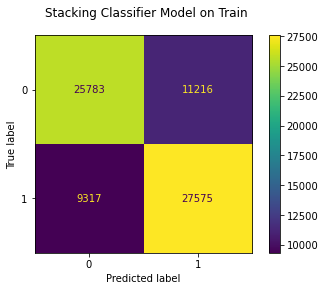

In [170]:
fig, ax = plt.subplots()

fig.suptitle("Stacking Classifier Model on Train")

plot_confusion_matrix(stacking_model, X_train_tv, y_train_tv, ax=ax)

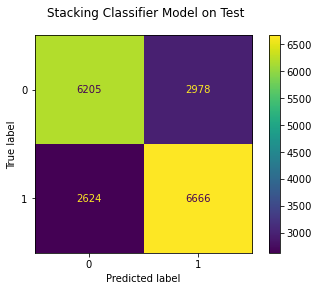

In [172]:
fig, ax = plt.subplots()

fig.suptitle("Stacking Classifier Model on Test")

plot_confusion_matrix(stacking_model, X_test_tv, y_test_tv, ax=ax)

In [169]:
#Looking at Training Score
print(stacking_model.score(X_train_tv, y_train_tv))

0.7221177139299779


In [173]:
#Model Evaluation
accuracy2 = accuracy_score(y_test_tv, y_pred3)
conf_matrix2 = confusion_matrix(y_test_tv, y_pred3)
classification_rep2 = classification_report(y_test_tv, y_pred3)

print(f"Accuracy: {accuracy2}")
print(f"Confusion Matrix:\n{conf_matrix2}")
print(f"Classification Report:\n{classification_rep2}")

Accuracy: 0.696746603150544
Confusion Matrix:
[[6205 2978]
 [2624 6666]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.68      0.69      9183
           1       0.69      0.72      0.70      9290

    accuracy                           0.70     18473
   macro avg       0.70      0.70      0.70     18473
weighted avg       0.70      0.70      0.70     18473



###### Looking at Feature Importances

In [190]:
#Extracting Feature Importances from the Best XGB and RF Models
feature_importances_rf_tv = base_model_rf.feature_importances_
feature_importances_xgb_tv = base_model_xgb.feature_importances_

In [191]:
#Extracting and Sorting the Feature Importances
feature_names = X_train_tv.columns

feature_importance_dict_rf = dict(zip(feature_names, feature_importances_rf_tv))
feature_importance_dict_xgb = dict(zip(feature_names, feature_importances_xgb_tv))
sorted_feature_importance_rf = dict(sorted(feature_importance_dict_rf.items(), key=lambda item: item[1], reverse=True)[:10])
sorted_feature_importance_xgb = dict(sorted(feature_importance_dict_xgb.items(), key=lambda item: item[1], reverse=True)[:10])


###### Top 10 Feature Importances: 

###### XGB

In [193]:
sorted_feature_importance_xgb

{'ROAD_DEFECT_RUT, HOLES': 0.13282505,
 'ROADWAY_SURFACE_COND_ICE': 0.05840006,
 'MANEUVER_PASSING/OVERTAKING': 0.03762629,
 'MANEUVER_SKIDDING/CONTROL LOSS': 0.0326024,
 'MANEUVER_CHANGING LANES': 0.030215977,
 'WEATHER_CONDITION_CLEAR': 0.027446792,
 'MANEUVER_OTHER': 0.02605336,
 'MANEUVER_U-TURN': 0.023584208,
 'ROAD_DEFECT_OTHER': 0.02240528,
 'VEHICLE_TYPE_UNKNOWN/NA': 0.021395873}

###### RF

In [194]:
sorted_feature_importance_rf

{'ROAD_DEFECT_RUT, HOLES': 0.05645262324059971,
 'CRASH_HOUR': 0.05555619387826054,
 'WEATHER_CONDITION_CLEAR': 0.054109648605325376,
 'MANEUVER_PASSING/OVERTAKING': 0.05321098109402222,
 'WEATHER_CONDITION_SNOW': 0.04986857608792069,
 'ROADWAY_SURFACE_COND_SNOW OR SLUSH': 0.04866723068492083,
 'ROADWAY_SURFACE_COND_ICE': 0.03832337226654902,
 'VEHICLE_TYPE_UNKNOWN/NA': 0.03285615569803651,
 'MANEUVER_STRAIGHT AHEAD': 0.0312895027236073,
 'MANEUVER_SKIDDING/CONTROL LOSS': 0.031096388965273402}

###### Key Takeaways:
- Road Defects, including Ruts and Potholes, is the top feature for both models indicating that it is an important predictor of traffic-violation related crashes. Road defects may increase the risks of violating traffic laws (speeding etc.)
- Another common top predictor is Icy/or Snow/Slushy Surface; This again may penalize speeding/otherwise violating traffic laws driver's in that mistakes are amplified
- Another common predictor is executing an overtaking maneuver 

###### Recommendations 
- Fix and maintain roads to eliminate dangerous defects 
- increase/enhance enforcement of penalties on days with snowy/icy road conditions and have law enforcement focus on illegal/violating overtaking maneuevers to disincentivize these and hopefully minimize crashes associated with traffic violations

## Model 4: Random Forest (Enviromental Factors)

###### Intializing the CVSearch and Train Test Splitting the Data

In [198]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 15],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__criterion': ['gini', 'entropy']
}


pipeline_model4 = Pipeline([
    ('classifier', RandomForestClassifier(n_jobs=20))
])

grid_search_model4 = GridSearchCV(estimator = pipeline_model2, param_grid = param_grid, cv=3, verbose=3, n_jobs=20)

X_ef = preprocessed_df.drop(columns=["prim_cause_category", "Traffic Violations_target", "Distracted Driving_target", "Vehicle-Related Issues_target", "Environmental Factors_target"])
y_ef = preprocessed_df["Environmental Factors_target"]


X_train_ef, X_test_ef, y_train_ef, y_test_ef = train_test_split(X_ef, y_ef, test_size=0.2, random_state=42)

###### Fitting the Models

In [199]:
grid_search_model4.fit(X_train_ef, y_train_ef)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  90 out of  96 | elapsed:  4.1min remaining:   16.2s
[Parallel(n_jobs=20)]: Done  96 out of  96 | elapsed:  4.1min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('classifier',
                                        RandomForestClassifier(n_jobs=20))]),
             n_jobs=20,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 15],
                         'classifier__max_features': ['auto', 'sqrt'],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             verbose=3)

###### Extracting Best Model

In [272]:
best_params = grid_search_model4.best_params_
print(best_params)
best_model_xgb_ef = grid_search_model4.best_estimator_
best_score = grid_search_model4.best_score_
best_score

{'classifier__criterion': 'gini', 'classifier__max_depth': 15, 'classifier__max_features': 'sqrt', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}


0.8400617144785825

## Model #5 XGBoost Environmental Factors


###### Setting up CV Search

In [205]:
param_grid = {
    'classifier__n_estimators': [200, 300], 
    'classifier__max_depth': [10, 20],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__subsample': [0.8, 0.9],
}
xgb_classifier = xgb.XGBClassifier()


pipeline_model5 = Pipeline([
    ('ss', StandardScaler()),
    ('classifier', xgb_classifier)
])
grid_search_model5 = GridSearchCV(estimator = pipeline_model5, param_grid = param_grid, cv=3, verbose=3, n_jobs=20)




###### Fitting the Models

In [206]:
grid_search_model5.fit(X_train_ef, y_train_ef)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  26 out of  48 | elapsed: 10.9min remaining:  9.2min
[Parallel(n_jobs=20)]: Done  43 out of  48 | elapsed: 18.0min remaining:  2.1min
[Parallel(n_jobs=20)]: Done  48 out of  48 | elapsed: 18.9min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                               

###### Extracting Best Model from the CV Search

In [273]:
best_params = grid_search_model5.best_params_
print(best_params)
best_model_xgb_ef = grid_search_model5.best_estimator_
best_score = grid_search_model5.best_score_
best_score

{'classifier__learning_rate': 0.01, 'classifier__max_depth': 10, 'classifier__n_estimators': 300, 'classifier__subsample': 0.9}


0.8404812378109202

## Model 6: Stacking Classifier (Environmental Factors )

###### Extracting Best Model from Best Extracted Pipeline

In [274]:
base_model_rf_ef = best_model_rf_ef.named_steps['classifier']
base_model_xgb_ef = best_model_xgb_ef.named_steps['classifier']  

###### Setting up Final Estimator for Stacking Classifier

In [218]:
final_model_2 = LogisticRegression()

###### Intializing Stacking Classifier

In [241]:
base_models_2 = [("rf",base_model_rf_ef),("xgb", base_model_xgb_ef)]
stacking_model_2 = StackingClassifier(estimators=base_models_2, final_estimator=final_model_2)
stacking_model_2.fit(X_train_ef, y_train_ef)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=15,
                                                       max_features='sqrt',
                                                       min_samples_split=5,
                                                       n_estimators=200,
                                                       n_jobs=20)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.01,
                                              max_de

###### Prediction on the Test

In [243]:
y_pred4 = stacking_model_2.predict(X_test_ef)

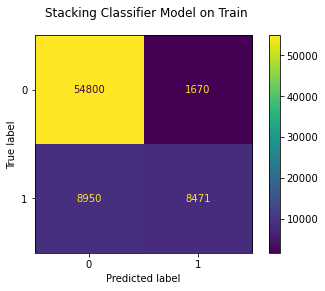

In [244]:
fig, ax = plt.subplots()

fig.suptitle("Stacking Classifier Model on Train")

plot_confusion_matrix(stacking_model_2, X_train_ef, y_train_ef, ax=ax)

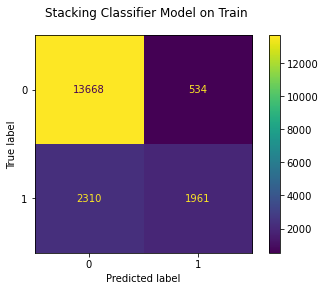

In [245]:
fig, ax = plt.subplots()

fig.suptitle("Stacking Classifier Model on Train")

plot_confusion_matrix(stacking_model_2, X_test_ef, y_test_ef, ax=ax)

###### Evaluating Results

In [246]:
accuracy3 = accuracy_score(y_test_dd, y_pred4)
conf_matrix3 = confusion_matrix(y_test_dd, y_pred4)
classification_rep3 = classification_report(y_test_dd, y_pred4)


print(f"Accuracy: {accuracy4}")
print(f"Confusion Matrix:\n{conf_matrix4}")
print(f"Classification Report:\n{classification_rep4}")

Accuracy: 0.8456666486223137
Confusion Matrix:
[[13673   529]
 [ 2322  1949]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.96      0.91     14202
           1       0.79      0.46      0.58      4271

    accuracy                           0.85     18473
   macro avg       0.82      0.71      0.74     18473
weighted avg       0.84      0.85      0.83     18473



- This Model, Overall, is Quite Good. It does a good job with precision and is similarly adept at correctly classifying the minority and majority classes
- The only thing to be desired is the recall for the minority class but overall it's a decent result

###### Extracting Feature Importance

In [275]:
feature_importances_rf_ef = base_model_rf_ef.feature_importances_
feature_importances_xgb_ef = base_model_xgb_ef.feature_importances_

###### Sorting Feature Importances and Ranking into top 10

In [276]:
feature_names = X_train_ef.columns

feature_importance_dict_rf_ef = dict(zip(feature_names, feature_importances_rf_ef))
feature_importance_dict_xgb_ef = dict(zip(feature_names, feature_importances_xgb_ef))
sorted_feature_importance_rf_ef = dict(sorted(feature_importance_dict_rf_ef.items(), key=lambda item: item[1], reverse=True)[:10])
sorted_feature_importance_xgb_ef = dict(sorted(feature_importance_dict_xgb_ef.items(), key=lambda item: item[1], reverse=True)[:10])


###### Random Forest Feature Importance

In [277]:
sorted_feature_importance_rf_ef

{'WEATHER_CONDITION_CLEAR': 0.136448742551223,
 'WEATHER_CONDITION_SNOW': 0.12638171982848465,
 'ROADWAY_SURFACE_COND_SNOW OR SLUSH': 0.1073100102163434,
 'ROAD_DEFECT_RUT, HOLES': 0.10538344599489798,
 'ROADWAY_SURFACE_COND_ICE': 0.07478381855189199,
 'WEATHER_CONDITION_RAIN': 0.04295527146602885,
 'ROADWAY_SURFACE_COND_WET': 0.042676797262312834,
 'CRASH_MONTH': 0.031638746219184076,
 'ROAD_DEFECT_NO DEFECTS': 0.029894871234032946,
 'ROAD_DEFECT_OTHER': 0.02513702881114677}

###### XGBoost Feature Importance

In [278]:
sorted_feature_importance_xgb_ef

{'WEATHER_CONDITION_CLEAR': 0.4920067,
 'WEATHER_CONDITION_SNOW': 0.102035984,
 'ROAD_DEFECT_RUT, HOLES': 0.08848574,
 'ROADWAY_SURFACE_COND_ICE': 0.03640183,
 'ROADWAY_SURFACE_COND_UNKNOWN': 0.028032944,
 'ROAD_DEFECT_OTHER': 0.021701712,
 'WEATHER_CONDITION_CLOUDY/OVERCAST': 0.013265923,
 'ROADWAY_SURFACE_COND_SNOW OR SLUSH': 0.013091118,
 'ROADWAY_SURFACE_COND_WET': 0.008959251,
 'ROAD_DEFECT_UNKNOWN': 0.0074572377}

###### Conclusion:

- Weather Condition Clear is the top predictor of this crash, which is perplexing given this is the environmental factors crash cause
- Environmental Factors include the following more granular crash types:
    - Weather 
    - Vision Obscured 
    - Road Engineering/Surface/Marking Defects 
    - Road Construction 
    - Evasive Action Due to Animal 
    - Object
    - Non-Motorist 
    - Animal
- Unsuprisingly, Road Defects and Weather related factors comprise the top 10 of both feature importance arrays
- Weather can't be controlled so likely fixing road defects is the only actionable takeaway from this category

## Model 7: XGB (Distracted Driving)

###### Splitting the Train Test Data for Distracted Driving

In [279]:
X_dd = preprocessed_df.drop(columns=["prim_cause_category", "Traffic Violations_target", "Distracted Driving_target", "Vehicle-Related Issues_target", "Environmental Factors_target"])
y_dd = preprocessed_df["Distracted Driving_target"]


X_train_dd, X_test_dd, y_train_dd, y_test_dd = train_test_split(X_dd, y_dd, test_size=0.2, random_state=42)

###### Intilizing CVSearch

In [280]:
param_grid = {
    'classifier__n_estimators': [200, 300], 
    'classifier__max_depth': [10, 20],
    'classifier__learning_rate': [0.1, 0.01],
    'classifier__subsample': [0.8, 0.9],
}
xgb_classifier = xgb.XGBClassifier()


pipeline_model7 = Pipeline([
    ('ss', StandardScaler()),
    ('classifier', xgb_classifier)
])
grid_search_model7 = GridSearchCV(estimator = pipeline_model7, param_grid = param_grid, cv=3, verbose=3, n_jobs=20)




###### Fitting the Models

In [281]:
grid_search_model7.fit(X_train_dd, y_train_dd)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  26 out of  48 | elapsed: 16.9min remaining: 14.3min
[Parallel(n_jobs=20)]: Done  43 out of  48 | elapsed: 28.3min remaining:  3.3min
[Parallel(n_jobs=20)]: Done  48 out of  48 | elapsed: 30.4min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('ss', StandardScaler()),
                                       ('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                               

###### Extracting Best Model

In [282]:
best_params = grid_search_model7.best_params_
print(best_params)
best_model_xgb_dd = grid_search_model7.best_estimator_
best_score = grid_search_model7.best_score_
best_score

{'classifier__learning_rate': 0.01, 'classifier__max_depth': 10, 'classifier__n_estimators': 300, 'classifier__subsample': 0.8}


0.8409955218357096

###### Model #8 Random Forest - Distracted Driving

###### Intializing CV Search

In [283]:
param_grid = {
    'classifier__n_estimators': [100, 200],
    'classifier__max_depth': [10, 15],
    'classifier__min_samples_split': [2, 5],
    'classifier__max_features': ['auto', 'sqrt'],
    'classifier__criterion': ['gini', 'entropy']
}


pipeline_model8 = Pipeline([
    ('classifier', RandomForestClassifier(n_jobs=20))
])

grid_search_model8 = GridSearchCV(estimator = pipeline_model8, param_grid = param_grid, cv=3, verbose=3, n_jobs=20)


###### Fitting the Models 

In [284]:
grid_search_model8.fit(X_train_ef, y_train_ef)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


[Parallel(n_jobs=20)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  90 out of  96 | elapsed:  2.9min remaining:   11.5s
[Parallel(n_jobs=20)]: Done  96 out of  96 | elapsed:  2.9min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        RandomForestClassifier(n_jobs=20))]),
             n_jobs=20,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [10, 15],
                         'classifier__max_features': ['auto', 'sqrt'],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [100, 200]},
             verbose=3)

###### Extracting Best Model

In [285]:
best_params = grid_search_model8.best_params_
print(best_params)
best_model_rf_dd = grid_search_model8.best_estimator_
best_score = grid_search_model8.best_score_
best_score

{'classifier__criterion': 'entropy', 'classifier__max_depth': 15, 'classifier__max_features': 'auto', 'classifier__min_samples_split': 5, 'classifier__n_estimators': 100}


0.8401293732932101

###### Extracting Classifier's from Best Pipeline Models

In [286]:
base_model_rf_dd = best_model_rf_dd.named_steps['classifier']
base_model_xgb_dd = best_model_xgb_dd.named_steps['classifier']  

###### Model #9 Stacking Classifier for Distracted Driving

###### Intializing Final Estimator and Stacking Classifier

In [300]:
final_model_3 = LogisticRegression()
base_models_3 = [("rf",base_model_rf_ef),("xgb", base_model_xgb_ef)]
stacking_model = StackingClassifier(estimators=base_models_3, final_estimator=final_model_3)
stacking_model.fit(X_train_dd, y_train_dd)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=15,
                                                       max_features='sqrt',
                                                       min_samples_split=5,
                                                       n_estimators=200,
                                                       n_jobs=20)),
                               ('xgb',
                                XGBClassifier(base_score=0.5, booster='gbtree',
                                              colsample_bylevel=1,
                                              colsample_bynode=1,
                                              colsample_bytree=1, gamma=0,
                                              gpu_id=-1, importance_type='gain',
                                              interaction_constraints='',
                                              learning_rate=0.01,
                                              max_de

###### Predicting on the Test

In [305]:
y_pred5 = stacking_model.predict(X_test_dd)

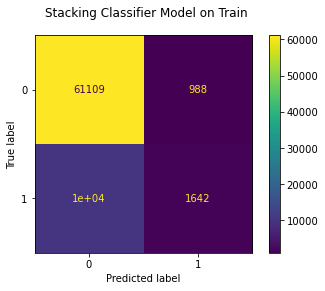

In [306]:
fig, ax = plt.subplots()

fig.suptitle("Stacking Classifier Model on Train")

plot_confusion_matrix(stacking_model, X_train_dd, y_train_dd, ax=ax)

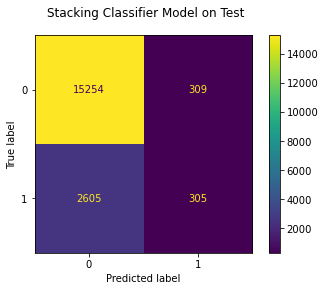

In [307]:
fig, ax = plt.subplots()

fig.suptitle("Stacking Classifier Model on Test")

plot_confusion_matrix(stacking_model, X_test_dd, y_test_dd, ax=ax)

###### Model Evaluation

In [308]:
accuracy4 = accuracy_score(y_test_dd, y_pred5)
conf_matrix4 = confusion_matrix(y_test_dd, y_pred5)
classification_rep4 = classification_report(y_test_dd, y_pred5)

print(f"Accuracy: {accuracy4}")
print(f"Confusion Matrix:\n{conf_matrix4}")
print(f"Classification Report:\n{classification_rep4}")

Accuracy: 0.8422562659015861
Confusion Matrix:
[[15254   309]
 [ 2605   305]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91     15563
           1       0.50      0.10      0.17      2910

    accuracy                           0.84     18473
   macro avg       0.68      0.54      0.54     18473
weighted avg       0.80      0.84      0.80     18473



###### Results Evaluation 

The Model Acheived 84.2% Accuracy, which seems good, however the model is underperforming on classifying on the minority class
    - It only acheives 50% precision on the minority class which is about as good as randomly guessing.

In [291]:
feature_importances_rf_dd = base_model_rf_dd.feature_importances_
feature_importances_xgb_dd = base_model_xgb_dd.feature_importances_

In [292]:
feature_names = X_train_dd.columns

feature_importance_dict_rf_dd = dict(zip(feature_names, feature_importances_rf_dd))
feature_importance_dict_xgb_dd = dict(zip(feature_names, feature_importances_xgb_dd))
sorted_feature_importance_rf_dd = dict(sorted(feature_importance_dict_rf_dd.items(), key=lambda item: item[1], reverse=True)[:10])
sorted_feature_importance_xgb_dd = dict(sorted(feature_importance_dict_xgb_dd.items(), key=lambda item: item[1], reverse=True)[:10])


###### XGBoost Feature Importance

In [293]:
sorted_feature_importance_xgb_dd

{'WEATHER_CONDITION_CLEAR': 0.08245022,
 'ROADWAY_SURFACE_COND_SNOW OR SLUSH': 0.049165007,
 'ROAD_DEFECT_RUT, HOLES': 0.038293786,
 'LIGHTING_CONDITION_DARKNESS, LIGHTED ROAD': 0.02742191,
 'ROADWAY_SURFACE_COND_ICE': 0.026420686,
 'MANEUVER_STRAIGHT AHEAD': 0.024488121,
 'MANEUVER_PASSING/OVERTAKING': 0.023601545,
 'MANEUVER_SLOW/STOP IN TRAFFIC': 0.021619132,
 'VEHICLE_TYPE_UNKNOWN/NA': 0.020935193,
 'MANEUVER_CHANGING LANES': 0.02038911}

###### Random Forest Feature Importance 

In [294]:
sorted_feature_importance_rf_dd

{'WEATHER_CONDITION_CLEAR': 0.15399593769831993,
 'WEATHER_CONDITION_SNOW': 0.10793584668692917,
 'ROAD_DEFECT_RUT, HOLES': 0.09323719809401416,
 'ROADWAY_SURFACE_COND_SNOW OR SLUSH': 0.09048174146416985,
 'ROADWAY_SURFACE_COND_ICE': 0.06989832895770214,
 'ROADWAY_SURFACE_COND_WET': 0.04918333659082352,
 'WEATHER_CONDITION_RAIN': 0.03914730614911011,
 'ROAD_DEFECT_NO DEFECTS': 0.03193895623891997,
 'CRASH_MONTH': 0.030939976851954668,
 'ROAD_DEFECT_OTHER': 0.02425734237940196}

###### Conclusions for Distracted Driving

- Once Again Weather/Surface Conditions and Road Defects dominate the feature importance; Clear Weather shows up again; this may be due to the fact that Driver's are more comfortable taking risks in a safe-seeming environment; in other words, clear dry conditions may lull drivers into complacency
- Road Defects and Weather Conditions/Surface Conditions once again dominate the top 10 in terms of feature importance suggesting these factors may play a role in all types of crashes and increase the risk of crash from all causes

###### Overall Conclusion/Recommendations

Recommendations
- Fix road defects; Road defects were one of the largest predictors for each crash type so fixing these could ameliorate crashes related to potholes, rutts etc.
- Adverse weather/road surface conditions also contributed to a vareity of crashes including those involving Traffic Violations and Distracted Driving, increased enforcement and penalties should be considered to attept to get drivers to behave with more caution in these dangerous situations